In [40]:
# Path
import os, sys
os.chdir('/home/zwang34/IBL/iblfm_exp/IBL_foundation_model')
sys.path.append('./src')
print(sys.path)

import torch
import os
import matplotlib.pyplot as plt

model_name = 'linear'
eid = '746d1902-fa59-4cab-b0aa-013be36060d5'
t_res = 2
nonrandomized = False

path = os.path.join(
    '/expanse/lustre/scratch/zwang34/temp_project/random_exp/detime',
    eid,
    'model_{}_tres_{}s_nonrand_{}'.format(model_name, t_res, nonrandomized),
)


model = torch.load(os.path.join(path, 'model_best.pth'))

['/home/zwang34/miniconda3/envs/ibl-fm/lib/python310.zip', '/home/zwang34/miniconda3/envs/ibl-fm/lib/python3.10', '/home/zwang34/miniconda3/envs/ibl-fm/lib/python3.10/lib-dynload', '', '/home/zwang34/miniconda3/envs/ibl-fm/lib/python3.10/site-packages', './src', './src', './src', './src', './src', './src', './src', './src', './src']


In [41]:
model

DeTime(
  (decoder): Linear(in_features=133700, out_features=1990, bias=True)
  (loss_fn): BCELoss()
)

(1990, 133700)
(1990, 100, 1337)


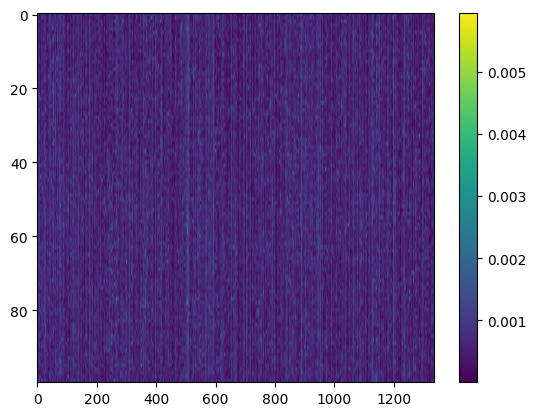

In [42]:
weights = model.decoder.weight.data.cpu().numpy()
print(weights.shape)
weights = weights.reshape(weights.shape[0], 100, -1)
print(weights.shape)
plt.imshow(abs(weights.mean(axis=0)), aspect='auto')
plt.colorbar()

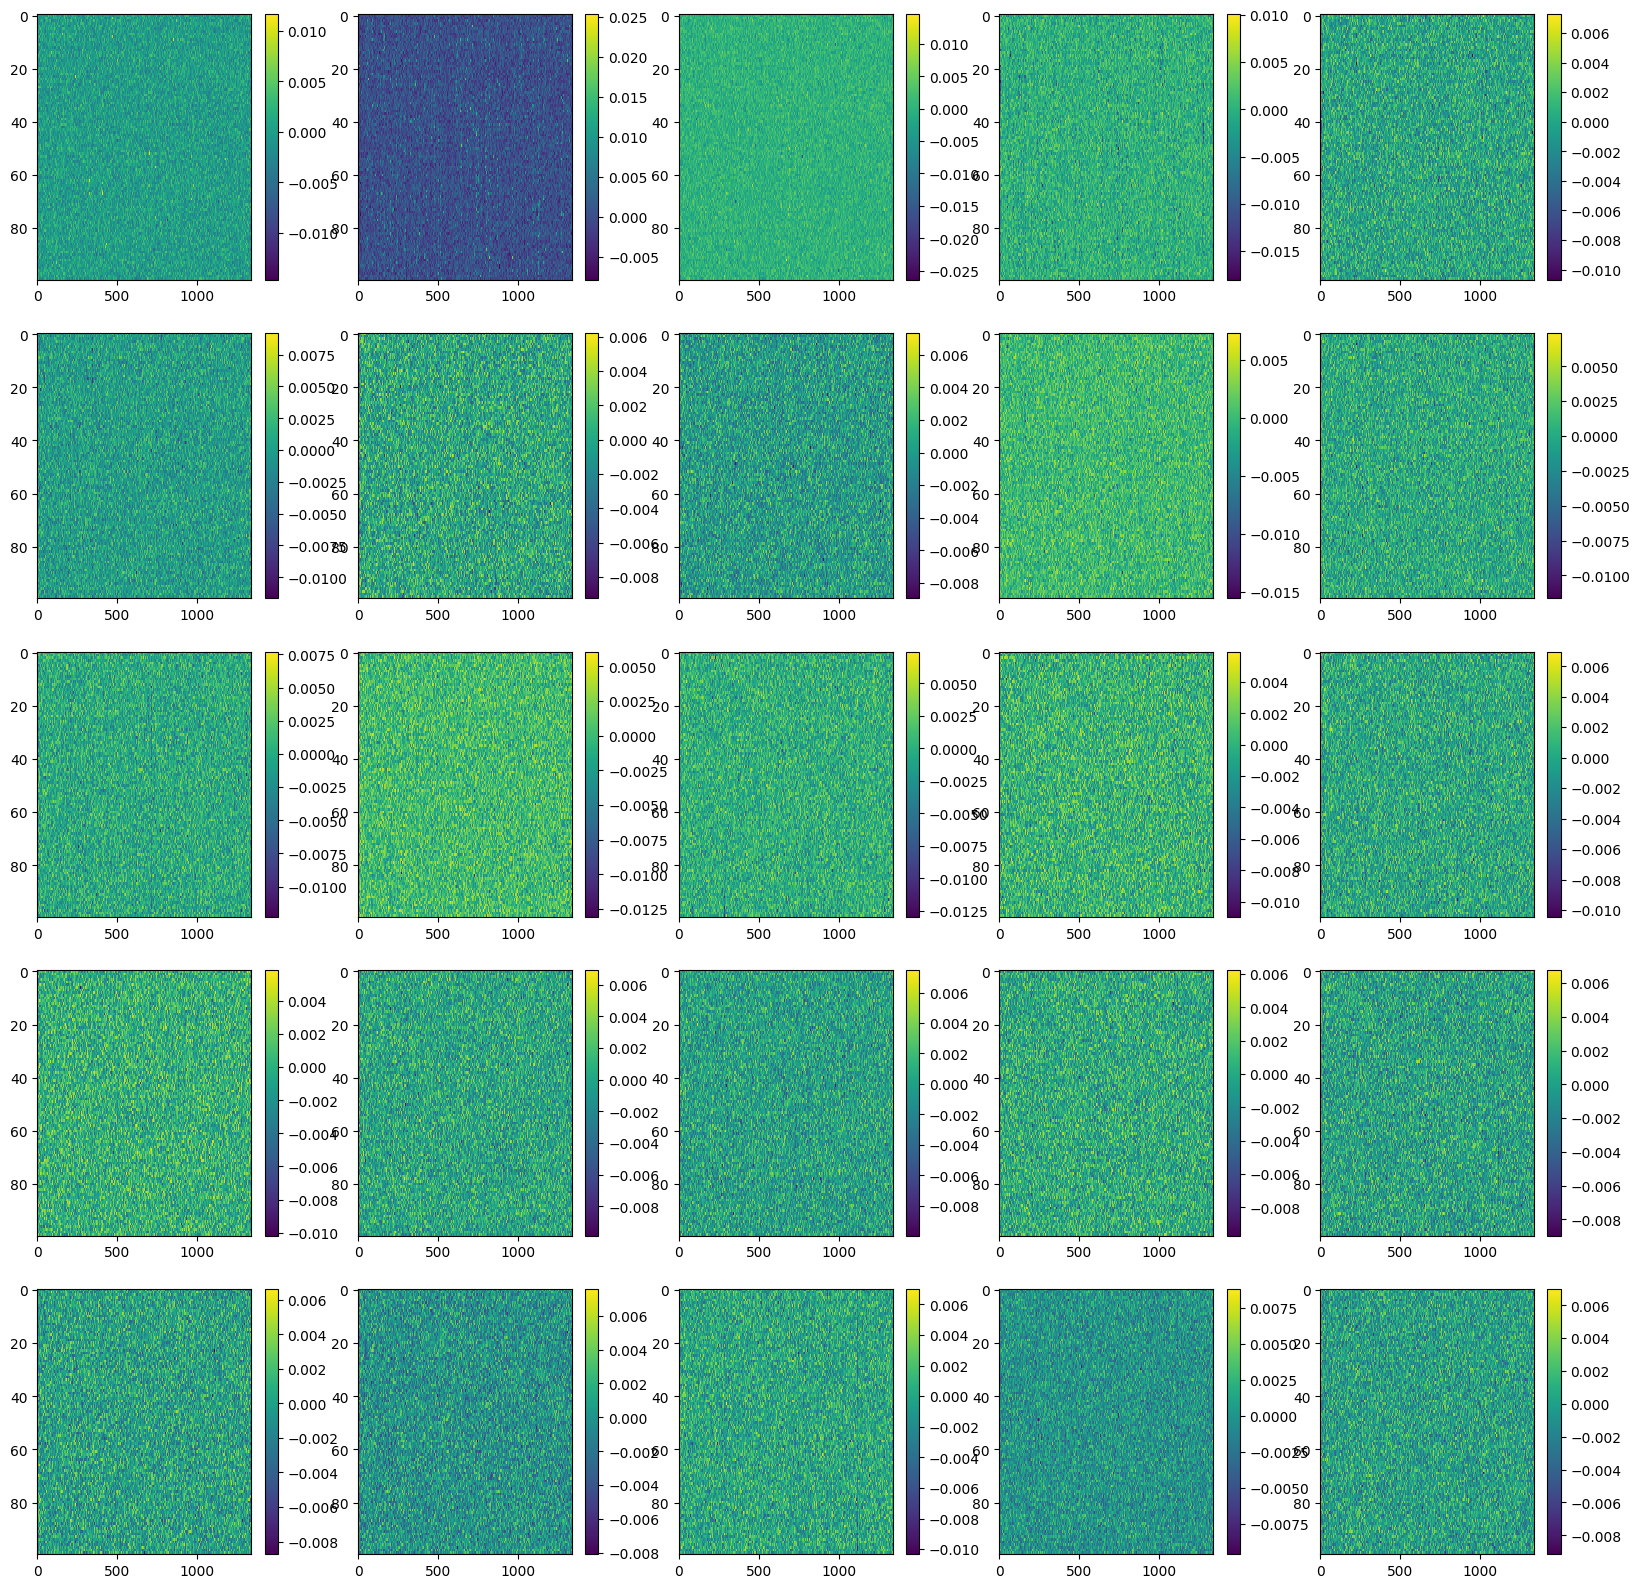

In [45]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
for i in range(25):
    im=axes.flat[i].imshow(weights[10*(i+1)]-weights[10*i], aspect='auto', interpolation='none')
    fig.colorbar(im)

## Note
- Is mean firing rate across 1 trial enough for this decoding?